# Neural-Network Regression Task On "Communities And Crimes" Dataset:

---

---

## Note About The DataSet:

We are excluding state, county, and community codes from the model because We want to build a general model that's not limited to specific US locations. These are nominal identifiers that would massively increase feature dimensionality if one-hot encoded. Even though, the dataset is based on the U.S. Sociology, so the model may still exhibit biases or behavior that do not generalize well to other countries or regions.

Plus We remove the fold attribute (not used for prediction).

### Data Organization:

In [1214]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

In [411]:
# Replace 'your_file.csv' with the path to your file
df = pd.read_csv('Data/communities+and+crime/data_final_with_outlier.csv')
data = df.loc[:, 'racepctblack':]
data

,racepctblack,racePctWhite,racePctAsian,pctUrban,pctWFarmSelf,pctWInvInc,pctWPubAsst,pctWRetire,blackPerCap,indianPerCap,...,NumStreet,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.02,0.90,0.12,1.0,0.34,0.60,0.15,0.43,0.32,0.27,...,0.00,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.12,0.74,0.45,1.0,0.11,0.45,0.29,0.39,0.33,0.16,...,0.00,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.49,0.56,0.17,0.0,0.19,0.39,0.40,0.84,0.27,0.07,...,0.00,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,1.00,0.08,0.12,1.0,0.21,0.43,0.20,0.82,0.39,0.16,...,0.00,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.02,0.95,0.09,0.9,0.16,0.68,0.11,0.71,0.28,0.00,...,0.00,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.10,0.87,0.12,1.0,0.14,0.64,0.06,0.46,0.27,0.00,...,0.00,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,0.46,0.28,0.83,1.0,0.10,0.30,0.37,0.48,0.26,0.18,...,0.00,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,0.25,0.69,0.04,1.0,0.17,0.45,0.48,0.57,0.25,0.19,...,0.02,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1992,0.06,0.87,0.22,1.0,0.21,0.55,0.24,0.45,0.29,0.20,...,0.01,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


In [412]:
X_pd = data.drop(columns=["ViolentCrimesPerPop"]) # features
y_pd = data["ViolentCrimesPerPop"] #target feature

print(y_pd.head())
X_pd.head()

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64


,racepctblack,racePctWhite,racePctAsian,pctUrban,pctWFarmSelf,pctWInvInc,pctWPubAsst,pctWRetire,blackPerCap,indianPerCap,...,NumInShelters,NumStreet,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.02,0.90,0.12,1.0,0.34,0.60,0.15,0.43,0.32,0.27,...,0.04,0.0,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32
1,0.12,0.74,0.45,1.0,0.11,0.45,0.29,0.39,0.33,0.16,...,0.00,0.0,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00
2,0.49,0.56,0.17,0.0,0.19,0.39,0.40,0.84,0.27,0.07,...,0.00,0.0,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00
3,1.00,0.08,0.12,1.0,0.21,0.43,0.20,0.82,0.39,0.16,...,0.00,0.0,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00
4,0.02,0.95,0.09,0.9,0.16,0.68,0.11,0.71,0.28,0.00,...,0.00,0.0,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00


In [413]:
# Data to numpy
X_np = X_pd.to_numpy()
y_np = y_pd.to_numpy()
print(y_np)
X_np

[0.2  0.67 0.43 ... 0.23 0.19 0.48]


array([[0.02, 0.9 , 0.12, ..., 0.26, 0.2 , 0.32],
       [0.12, 0.74, 0.45, ..., 0.12, 0.45, 0.  ],
       [0.49, 0.56, 0.17, ..., 0.21, 0.02, 0.  ],
       ...,
       [0.25, 0.69, 0.04, ..., 0.32, 0.18, 0.91],
       [0.06, 0.87, 0.22, ..., 0.38, 0.33, 0.22],
       [0.14, 0.46, 0.24, ..., 0.3 , 0.05, 1.  ]])

We need to split our data into "train, validation and test" sets.
So we will be spliting the data (1994 instances) into:
- 70% (1395 instances) for train
- 15% (299 instances) for validation
- 15% (300 instances) for test

In [414]:
# First split: train + temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(X_np, y_np, test_size=0.3, random_state=42)

# Second split: val + test from temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [415]:
print(X_train.shape, X_val.shape, X_test.shape)

(1395, 42) (299, 42) (300, 42)


Then in order to use the neural-net we must transform them into tensors:

In [416]:
# Transform to tensors:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)


print(X_train_tensor.shape, X_val_tensor.shape, X_test_tensor.shape)

torch.Size([1395, 42]) torch.Size([299, 42]) torch.Size([300, 42])


In [1324]:
# Transform to tensors:
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_train_tensor = y_train_tensor.view([1395,1])

y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
y_val_tensor = y_val_tensor.view([299,1])
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


print(y_train_tensor.shape, y_val_tensor.shape, y_test_tensor.shape)

torch.Size([1395, 1]) torch.Size([299, 1]) torch.Size([300])


### Neural-Net Architecture and Creation:

We will use a fully-connected Neural-Net and Since we have a simple tabular data we won't have to use many hidden layers, We will be starting by 1 then adding if needed (so the model won't over-fit if we make too deep considering we have only 1994 instances and 42 attributes).

We have an input size of 42 (number of features) and 1 output (prediction).

In [50]:
class NeuralReg1(nn.Module): # one hidden layer

    def __init__(self, hidden_size, activation_fn=nn.ReLU):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(42, hidden_size),
            activation_fn(),
            nn.Linear(hidden_size, 1)
        )

    def forward(self, x):
        return self.model(x)

In [51]:
class NeuralReg2(nn.Module): # two hidden layer

    def __init__(self, hidden_size1, hidden_size2, activation_fn1=nn.ReLU, activation_fn2=nn.ReLU):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(42, hidden_size1),
            activation_fn1(),
            nn.Linear(hidden_size1, hidden_size2),
            activation_fn2(),
            nn.Linear(hidden_size2, 1),
        )

    def forward(self, x):
        return self.model(x)

Now We fit our models:
We will be trying 3 one-hidden-layer models:
- one with a hidden-size of 21 (compresses data) and uses ReLU.
- one with a hidden-size of 62 (expands data) and uses ReLU.
- one with a hidden-size of 21 (compresses data) and uses LeakyReLU.

and compare between them.

In [852]:
Model1_1 = NeuralReg1(hidden_size=21)
Model1_2 = NeuralReg1(hidden_size=62)
Model1_3 = NeuralReg1(hidden_size=21, activation_fn=nn.LeakyReLU)

In [674]:
#Our models Weights and Biases
print("Model1_1 Parameters:")
for name, param in Model1_1.state_dict().items():
    print(f"{name}: {param.shape}")

print("\nModel1_2 Parameters:")
for name, param in Model1_2.state_dict().items():
    print(f"{name}: {param.shape}")

print("\nModel1_3 Parameters:")
for name, param in Model1_2.state_dict().items():
    print(f"{name}: {param.shape}")

Model1_1 Parameters:
model.0.weight: torch.Size([21, 42])
model.0.bias: torch.Size([21])
model.2.weight: torch.Size([1, 21])
model.2.bias: torch.Size([1])

Model1_2 Parameters:
model.0.weight: torch.Size([62, 42])
model.0.bias: torch.Size([62])
model.2.weight: torch.Size([1, 62])
model.2.bias: torch.Size([1])

Model1_3 Parameters:
model.0.weight: torch.Size([62, 42])
model.0.bias: torch.Size([62])
model.2.weight: torch.Size([1, 62])
model.2.bias: torch.Size([1])


In [854]:
# the fit function:
def fit(model, trainX_tensor, trainY_tensor, optimizer, loss_fn, iterations = 1000):
    losses = []
    for i in range(iterations):

        output = model.forward(trainX_tensor)

        loss = loss_fn(output, trainY_tensor)

        optimizer.zero_grad() # reset gradients
        loss.backward()
        optimizer.step()

        if(i%50==0):
            print("current loss: ", loss)
            losses.append(loss)
    return losses



In [853]:
#using Adam optimizer, creating optimizers and the loss function:
optimizer1 = torch.optim.Adam(Model1_1.parameters(), lr=0.01)
optimizer2 = torch.optim.Adam(Model1_2.parameters(), lr=0.01)
optimizer3 = torch.optim.Adam(Model1_3.parameters(), lr=0.01)

loss_fn = nn.MSELoss()

In [874]:
import pickle

def save_model_params(model, model_name):
    # Extract the state_dict of the model (weights and biases)
    model_params = model.state_dict()

    # Specify the filename for the pickle file
    filename = f"{model_name}_params.pkl"

    # Save the parameters to a pickle file
    with open(filename, 'wb') as f:
        pickle.dump(model_params, f)

    print(f"Model parameters saved to {filename}")

### Fitting:

We will use the MSE loss Function.

Since the models are very simple we will only do 500 iterations or we will face over-fitting.

#### Fitting Model1_1:

In [1314]:
loses1_1 = fit(Model1_1,X_train_tensor,y_train_tensor,optimizer1,loss_fn,500)

current loss:  tensor(0.0948, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0212, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0188, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0177, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0169, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0165, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0162, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0160, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0158, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0157, grad_fn=<MseLossBackward0>)


#### Fitting Model1_2:

In [864]:
loses1_2 = fit(Model1_2,X_train_tensor,y_train_tensor,optimizer2,loss_fn,500)

current loss:  tensor(0.0555, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0199, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0171, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0156, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0146, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0136, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0126, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0120, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0111, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0104, grad_fn=<MseLossBackward0>)


#### Fitting Model1_3:

In [857]:
loses1_3 = fit(Model1_3,X_train_tensor,y_train_tensor,optimizer3,loss_fn,500)

current loss:  tensor(0.1019, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0196, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0172, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0158, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0147, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0137, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0133, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0126, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0125, grad_fn=<MseLossBackward0>)
current loss:  tensor(0.0122, grad_fn=<MseLossBackward0>)


In [868]:
def plot_loss_curves(loss_lists, labels=None, title="Loss over Iterations", interval=50):
    """
    Plots loss values from multiple training runs.

    Args:
        loss_lists (list of list of tensors): Lists of losses (e.g., [[loss1, loss2], [loss3, loss4], ...])
        labels (list of str): Optional labels for each loss curve.
        title (str): Plot title.
        interval (int): Interval of iterations between recorded loss points.
    """
    plt.figure(figsize=(10, 5))

    for i, loss_list in enumerate(loss_lists):
        # Convert tensors to floats
        losses = [float(l.detach().cpu()) for l in loss_list]
        iters = [i * interval for i in range(len(losses))]
        
        label = labels[i] if labels else f"Model {i+1}"
        plt.plot(iters, losses, label=label)

    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


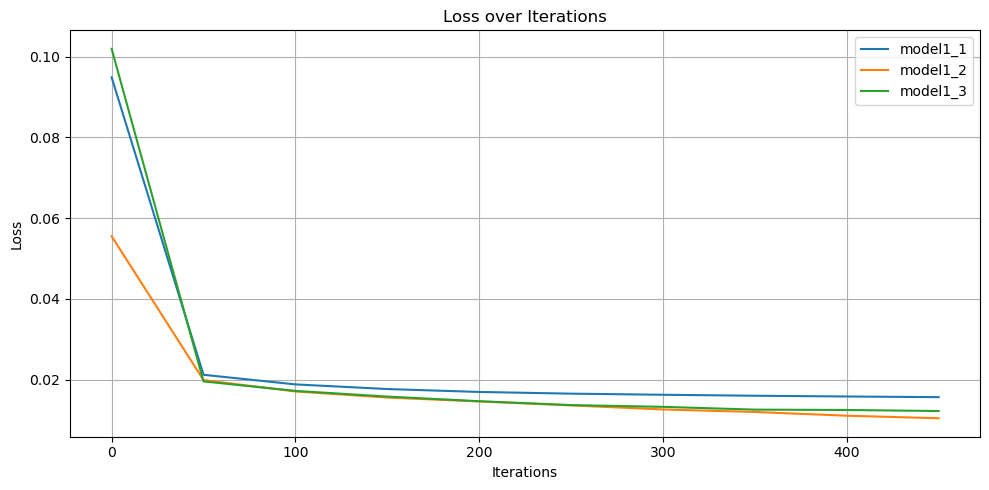

In [1315]:
plot_loss_curves([loses1_1,loses1_2,loses1_3],["model1_1","model1_2","model1_3"])

In [ ]:
#--- Plot Functions

def plot_actual_vs_predicted(y_true, y_pred, title="Actual vs Predicted Values", figsize=(10, 5)):
    """
    Plot actual vs predicted values for a regression task.

    Args:
        y_true (array-like or tensor): Actual target values.
        y_pred (array-like or tensor): Predicted target values.
        title (str): Plot title.
        figsize (tuple): Size of the figure.
    """
    # Convert tensors to numpy arrays if needed
    if torch.is_tensor(y_true):
        y_true = y_true.detach().cpu().numpy()
    if torch.is_tensor(y_pred):
        y_pred = y_pred.detach().cpu().numpy()
        
    # Flatten if necessary
    y_true = y_true.reshape(-1)
    y_pred = y_pred.reshape(-1)

    # Plotting
    plt.figure(figsize=figsize)
    plt.plot(y_true, label='Actual', color='blue', linewidth=2)
    plt.plot(y_pred, label='Predicted', color='orange', linestyle='--')
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Target Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def scatter_actual_vs_predicted(y_true, y_pred, title="Predicted vs Actual Scatter", figsize=(6, 6)):
    """
    Creates a scatter plot comparing actual vs predicted values.

    Args:
        y_true (array-like or tensor): Actual target values.
        y_pred (array-like or tensor): Predicted target values.
        title (str): Title for the plot.
        figsize (tuple): Figure size.
    """
    # Convert tensors to numpy arrays if needed
    if torch.is_tensor(y_true):
        y_true = y_true.detach().cpu().numpy()
    if torch.is_tensor(y_pred):
        y_pred = y_pred.detach().cpu().numpy()

    # Flatten if necessary
    y_true = y_true.reshape(-1)
    y_pred = y_pred.reshape(-1)

    # Create the scatter plot
    plt.figure(figsize=figsize)
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Validation:

- model 1_1:

Loss is:  0.01980698
R2 score is:  0.5887379050254822


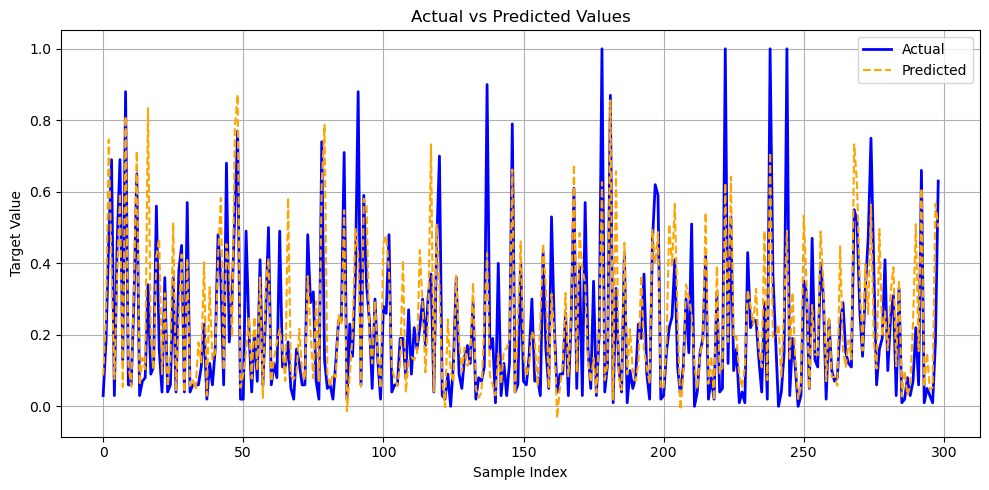

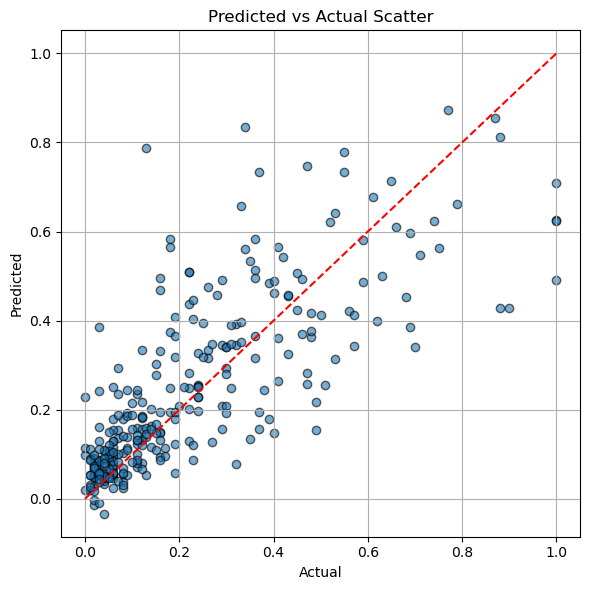

In [ ]:
out = Model1_1.forward(X_val_tensor)
print("Loss is: ",mean_squared_error(y_val_tensor,out.detach().numpy()))
print("R2 score is: ",r2_score(y_val_tensor,out.detach().numpy()))
plot_actual_vs_predicted(y_val_tensor,out)
scatter_actual_vs_predicted(y_val_tensor,out)

- model 1_2:

Loss is:  0.022743994
R2 score is:  0.5277552604675293


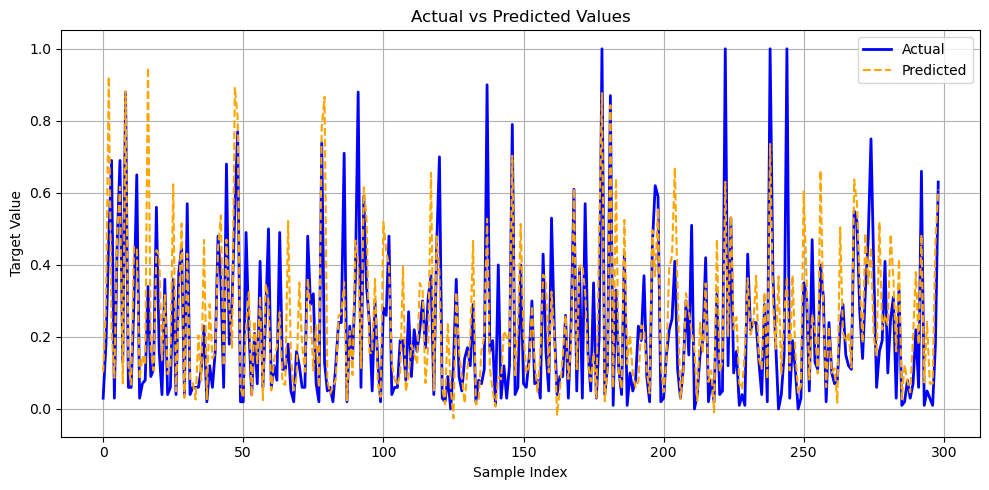

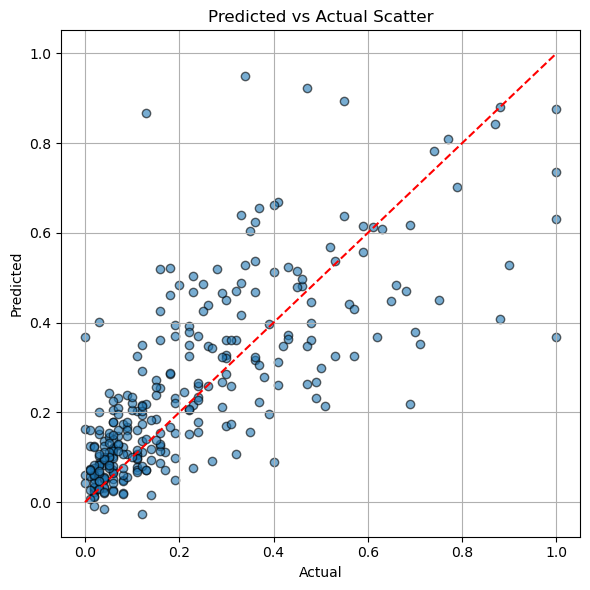

In [1219]:
out = Model1_2.forward(X_val_tensor)
print("Loss is: ",mean_squared_error(y_val_tensor,out.detach().numpy()))
print("R2 score is: ",r2_score(y_val_tensor,out.detach().numpy()))
plot_actual_vs_predicted(y_val_tensor,out)
scatter_actual_vs_predicted(y_val_tensor,out)

- model 1_3:

Loss is:  0.0200622
R2 score is:  0.5834386348724365


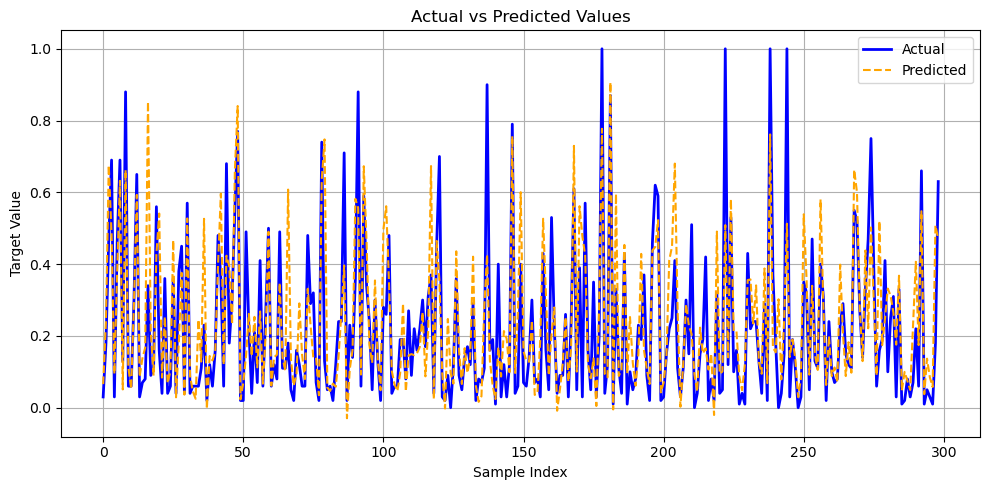

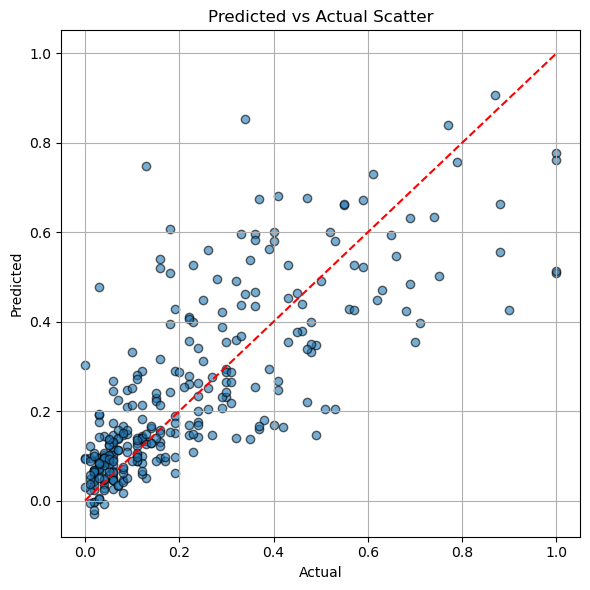

In [1220]:
out = Model1_3.forward(X_val_tensor)
print("Loss is: ",mean_squared_error(y_val_tensor,out.detach().numpy()))
print("R2 score is: ",r2_score(y_val_tensor,out.detach().numpy()))
plot_actual_vs_predicted(y_val_tensor,out)
scatter_actual_vs_predicted(y_val_tensor,out)

So We notice that model 1_1 has the best R2 score (even if they are all performing almost the same).

We can also quickly try a model with two hidden layers and we find that it performs almost the same as the model with 1 hidden layer so we choose the simpler one.

In [892]:
Model2 = NeuralReg2(21,10)
opti2 = torch.optim.Adam(Model2.parameters(),lr=0.01)

In [893]:
fit(Model2,X_train_tensor,y_train_tensor,opti2,loss_fn,50)

current loss:  tensor(0.0577, grad_fn=<MseLossBackward0>)


[tensor(0.0577, grad_fn=<MseLossBackward0>)]

Loss is:  0.01778145
R2 score is:  0.6307950019836426


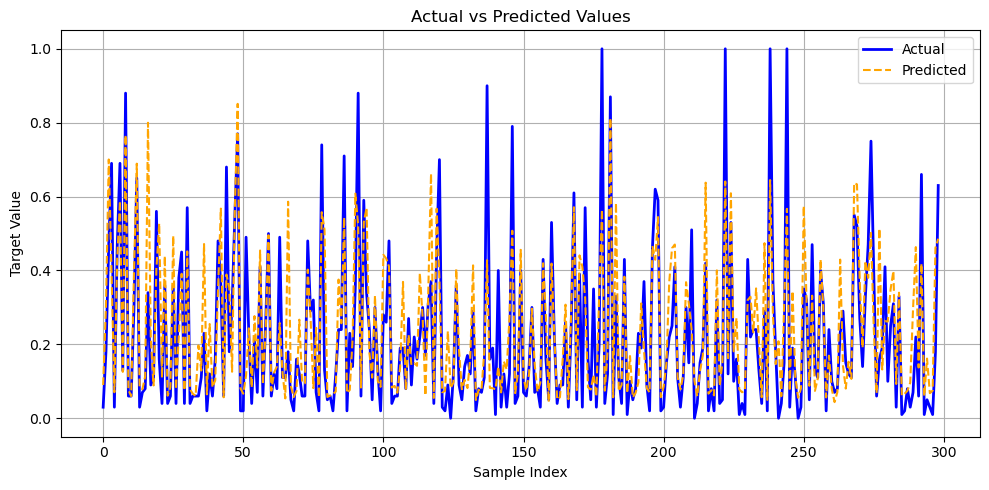

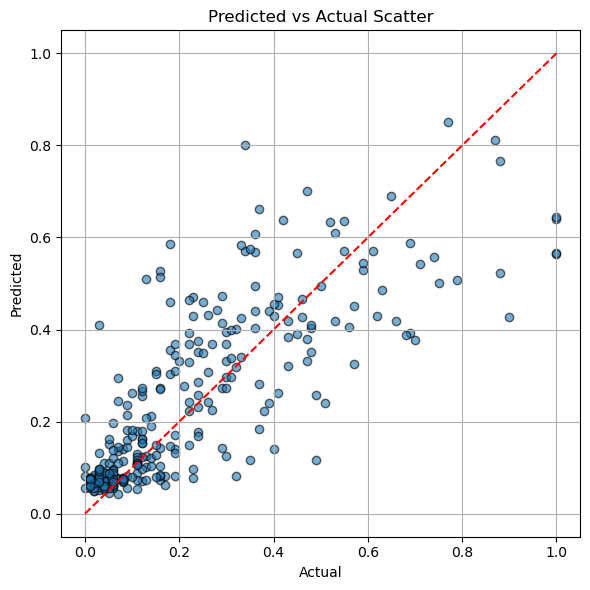

In [1221]:
out = Model2.forward(X_val_tensor)
print("Loss is: ",mean_squared_error(y_val_tensor,out.detach().numpy()))
print("R2 score is: ",r2_score(y_val_tensor,out.detach().numpy()))
plot_actual_vs_predicted(y_val_tensor,out)
scatter_actual_vs_predicted(y_val_tensor,out)

We save the parameters of Model1_1

In [1320]:
save_model_params(Model1_1,"NeuralReg")

Model parameters saved to NeuralReg_params.pkl


## Testing

Loss is:  0.017899388
R2 score is:  0.6239044070243835


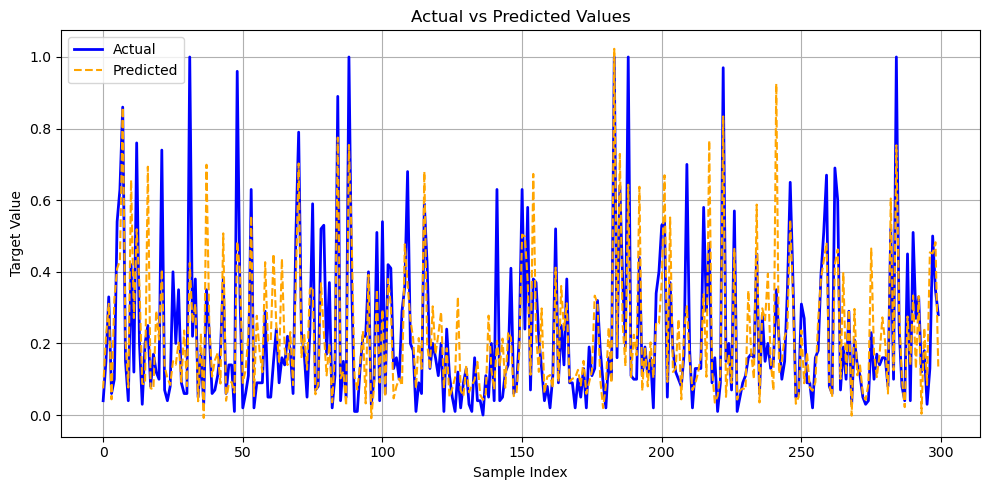

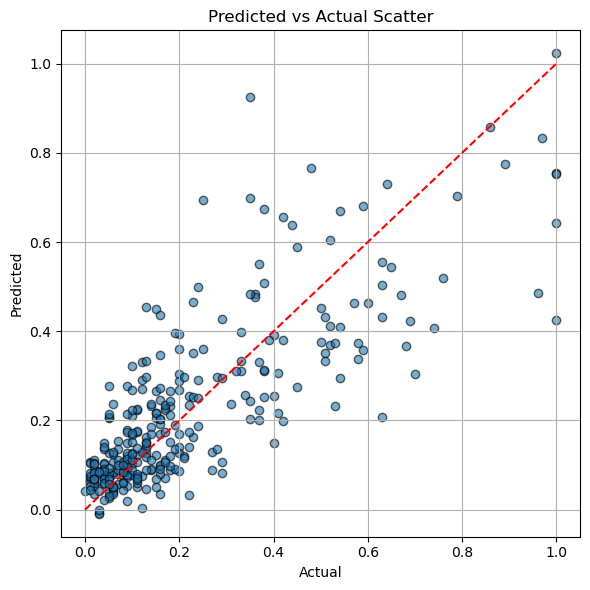

In [1319]:
out = Model1_1.forward(X_test_tensor)
print("Loss is: ",mean_squared_error(y_test_tensor,out.detach().numpy()))
print("R2 score is: ",r2_score(y_test_tensor,out.detach().numpy()))
plot_actual_vs_predicted(y_test_tensor,out)
scatter_actual_vs_predicted(y_test_tensor,out)

So Finally we achieved a Good 62% R2 score.

Note:
Other models (deeper) were tested and the maximum R2 score that could be achieved was 63%, So Model1_1 is good since it's simpler and performs similarly.